In [ ]:
Notebook to get and clean the data of La Liberté newspaper about covid19 vaccination

In [16]:
from helpers import *

In [2]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


In [3]:
def get_links_la_liberte(search_URL): 
    list_links=[]
    driver.get(search_URL)
    while True: 
        links = driver.find_elements_by_xpath('//h3/a')
        for i in links: 
            list_links.append(i.get_attribute('href'))
        try :
            next = driver.find_element_by_xpath('//a[@class="arrow"]')[1]
            next.click()
            time.sleep(0.5)
        except :
            print("No more pages left")
            break
    return list_links

In [17]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u200b', '', text)
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

In [5]:
def get_html_la_liberte(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/LA_LIBERTE/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(3)

In [6]:
# There are 85: 
# list_search_url =[]
# list_search_url.append('https://www.laliberte.ch/recherche?q=%22vaccination%22&date_start=20.01.2020&date_end=26.11.2021')
# for i in range(2, 86):
#     list_search_url.append(f'https://www.laliberte.ch/recherche/{i}?q=%22vaccination%22&date_start=20.01.2020&date_end=26.11.2021')

In [7]:
# list_links=[]
# for i in list_search_url: 
#     driver.get(i)
#     time.sleep(5)
#     links = driver.find_elements_by_xpath('//h3/a')
#     for j in links: 
#         list_links.append(j.get_attribute('href'))

## LA LIBERTÉ

In [8]:
search_url='https://www.laliberte.ch/recherche?q=%22vaccination%22&date_start=20.01.2020&date_end=26.11.2021'
email = 'ddbarrio@idiap.ch'
password = 'Vaccination_Project_2021'
driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
# driver.find_element_by_id('didomi-notice-agree-button').click()

In [9]:
# list_links_vaccination_section= get_links_la_liberte(search_url)

In [10]:
with open("list_links_laliberte.txt", 'r') as f:
    list_links_laliberte = [line.rstrip('\n') for line in f]
    


In [11]:
# UPDATE THE LIST WITH THE LAST PAGE WITH THE MOST RECENT ARTICLES

In [16]:
def get_links_la_liberte_update(search_URL): 
    list_links_update=[]
    driver.get(search_URL)
    links = driver.find_elements_by_xpath('//h3/a')
    for i in links: 
        list_links_update.append(i.get_attribute('href'))
        
    return list_links_update

In [17]:
list_links_update=get_links_la_liberte_update('https://www.laliberte.ch/recherche?q=vaccination&date_start=01.01.2020&date_end=30.11.2021&sort=pertinence&x=19&y=24')

In [18]:
len(list_links_laliberte),len(list_links_update)

(816, 10)

In [20]:
list_links_laliberte_last=list_links_laliberte + list_links_update
list_links_laliberte_last=list(set(list_links_laliberte_last))
len(list_links_laliberte_last)

822

In [76]:
# get_html_la_liberte(list_links_laliberte_last)

In [74]:
# get_html_la_liberte(list_links_laliberte_last[86:])

In [75]:
# get_html_la_liberte(list_links_laliberte_last[163:])

In [26]:
get_html_la_liberte(list_links_laliberte_last[752:])

In [3]:
import os
list_articles_liberte=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LA_LIBERTE/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LA_LIBERTE/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        #The first one is the name of the newspaper, so we take the second one
        title=soup.find_all("h1")[1].text.strip()
    except: 
        title="error"
    try:
        author=soup.find("p",style='text-transform: uppercase').text.strip()
    except: 
        try:
            author=soup.find("b").text.strip()
            #SUprime to get the texxt without the author at the end
            soup.find("b").decompose()
        except: 
            author = "error"
    try:
        link=soup.find("meta", property="og:url")['content']
    except: 
        link="error"
    try:
        subheadline= soup.find("p",class_="chapeau").text.strip()
    except: 
        try:
            subheadline= soup.find("p").find("strong")[0].text.strip()
        except:
            subheadline="error"
    try:
        date= soup.find(class_="date").text.strip()
    except: 
        date="error"
    try:   
#         if soup.find("p",style='text-transform: uppercase'):
#             m=soup.find("p",style='text-transform: uppercase').decompose()
#         elif soup.find("div", class_='blocArticles teaser-sous-article'): 
#             l=soup.find_all("div", class_='blocArticles teaser-sous-article').decompose()
#         if soup.find("div", {"id": "container-sp"}):
        tf=soup.find("div",{"id": "container-sp"}).find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        tf=soup.find_all("p",{'class': None})
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    list_articles_liberte.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [28]:
articles_la_liberte = pd.DataFrame.from_dict(list_articles_liberte)
articles_la_liberte

,Title,Subheadline,Text,Authors,Date,Link
0,La panne a touché l’HFR,error,Informatique » La panne informatique qui a e...,error,23.11.2021,https://www.laliberte.ch/news/regions/canton/l...
1,Des mesures incompréhensibles!,error,Les nouvelles mesures envisagées ou décidées p...,error,01.09.2021,https://www.laliberte.ch/news/des-mesures-inco...
2,Jauge revue à la hausse pour des festivals,error,Fribourg » Des manifestations fribourgeoises...,error,29.06.2021,https://www.laliberte.ch/news/regions/canton/j...
3,Un taux de vaccination trop faible en Suisse,error,Le titre de votre article du 4 novembre sur le...,error,11.11.2021,https://www.laliberte.ch/news/un-taux-de-vacci...
4,Principe de précaution oublié,error,Le sujet de la vaccination est omniprésent dan...,error,18.06.2021,https://www.laliberte.ch/news/principe-de-prec...
...,...,...,...,...,...,...
817,Vaccin: un geste qui ferait du bien,error,La vocation de la médecine est de faire du bie...,error,30.11.2021,https://www.laliberte.ch/news/vaccin-un-geste-...
818,Législatives au Japon: la coalition au pouvoir...,error,La coalition au pouvoir au Japon devrait conse...,"ats, afp",31.10.2021,https://www.laliberte.ch/news-agence/detail/le...
819,Vie privée face à vie publique,error,Plutôt que d’affirmer que la vie privée de Mon...,error,27.09.2021,https://www.laliberte.ch/news/vie-privee-face-...
820,Attention au retour des tiques,"Les beaux jours sont de retour, les tiques éga...","Les beaux jours sont de retour, les tiques éga...",error,11.05.2020,https://www.laliberte.ch/info-regionale/sante/...


## CLEAN ARTICLES

In [29]:
articles_la_liberte['Text']=articles_la_liberte['Text'].apply(preprocessor)
articles_la_liberte['n_words'] = articles_la_liberte.Text.apply(lambda x: len(str(x).split(' ')))
articles_la_liberte['Newspaper']= 'La Liberte'
articles_la_liberte['Country']= 'Switzerland'

In [30]:
#Videos that dont contain text
articles_la_liberte=articles_la_liberte.drop(articles_la_liberte[articles_la_liberte['n_words']<10].index, inplace=False)

In [31]:
articles_la_liberte=articles_la_liberte.drop_duplicates()
articles_la_liberte=articles_la_liberte[articles_la_liberte.Text.str.contains("vacc|Vacc")|articles_la_liberte.Subheadline.str.contains("vacc|Vacc")|articles_la_liberte.Title.str.contains("vacc|Vacc")]

In [32]:
#The articles without date are photos
articles_la_liberte=articles_la_liberte.drop(articles_la_liberte[articles_la_liberte['Date']=="error"].index, inplace=False)

In [35]:
articles_la_liberte.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
637,Extension de 60% des cas de cancer dans les 20...,error,Les cas de cancer vont augmenter de 60% dans l...,ats,2020-02-04,https://www.laliberte.ch/news-agence/detail/ex...,314,La Liberte,Switzerland
779,Les cancers pourraient exploser,error,"Santé » Dans les 20 prochaines années, l’OMS...",error,2020-02-05,https://www.laliberte.ch/news/international/le...,321,La Liberte,Switzerland
9,Agnès Buzyn à la rescousse,error,"Après le scandale, la ministre de la Santé rem...","Benjamin Masse, Paris",2020-02-18,https://www.laliberte.ch/news/international/ag...,752,La Liberte,Switzerland
410,"«Contaminé, suis-je payé?»",error,Que faire en cas de contamination au coronavir...,Igor Cardellini / Yves Genier,2020-03-05,https://www.laliberte.ch/news/suisse/contamine...,562,La Liberte,Switzerland
517,«On risque une seconde vague durant l'automne»,error,"Tant qu’il n’y a pas d’immunité grégaire, l’ép...",Thierry Jacolet,2020-03-21,https://www.laliberte.ch/news/international/on...,1952,La Liberte,Switzerland
...,...,...,...,...,...,...,...,...,...
762,"Covid-19, soins infirmiers et juges au menu de...",error,Les jeux sont presque faits sur les trois obje...,ats,2021-11-28,https://www.laliberte.ch/news-agence/detail/co...,663,La Liberte,Switzerland
314,Le tourisme mondial devrait perdre 2000 millia...,error,Le secteur touristique mondial devrait perdre ...,"ats, afp",2021-11-29,https://www.laliberte.ch/news-agence/detail/le...,608,La Liberte,Switzerland
215,Soutien accru au Conseil fédéral,error,Avec 62% des votants qui acceptent la loi Covi...,Xavier Lambiel,2021-11-29,https://www.laliberte.ch/news/suisse/soutien-a...,2309,La Liberte,Switzerland
15,Le vaccin obligatoire dénoncé,error,Autriche » Plusieurs dizaines de milliers de...,error,2021-11-29,https://www.laliberte.ch/news/international/le...,141,La Liberte,Switzerland


In [34]:
# #Date
#Date
# for index,row in articles_la_liberte.iterrows(): 
#     try:
#         articles_la_liberte['Date'][index] =dateparser.parse(row.Date)
#     except: 
#         continue
articles_la_liberte['Date'] = pd.to_datetime(articles_la_liberte['Date'],format="%d.%m.%Y")

In [36]:
articles_la_liberte.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_la_liberte_30_11_2021_premium.csv', index = False)

In [297]:
# ****************************************************

In [37]:
df= pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_la_liberte_30_11_2021_premium.csv')

In [38]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,n_words,Newspaper,Country
631,Extension de 60% des cas de cancer dans les 20...,error,Les cas de cancer vont augmenter de 60% dans l...,ats,2020-02-04,https://www.laliberte.ch/news-agence/detail/ex...,314,La Liberte,Switzerland
770,Les cancers pourraient exploser,error,"Santé » Dans les 20 prochaines années, l’OMS...",error,2020-02-05,https://www.laliberte.ch/news/international/le...,321,La Liberte,Switzerland
9,Agnès Buzyn à la rescousse,error,"Après le scandale, la ministre de la Santé rem...","Benjamin Masse, Paris",2020-02-18,https://www.laliberte.ch/news/international/ag...,752,La Liberte,Switzerland
406,"«Contaminé, suis-je payé?»",error,Que faire en cas de contamination au coronavir...,Igor Cardellini / Yves Genier,2020-03-05,https://www.laliberte.ch/news/suisse/contamine...,562,La Liberte,Switzerland
512,«On risque une seconde vague durant l'automne»,error,"Tant qu’il n’y a pas d’immunité grégaire, l’ép...",Thierry Jacolet,2020-03-21,https://www.laliberte.ch/news/international/on...,1952,La Liberte,Switzerland
...,...,...,...,...,...,...,...,...,...
753,"Covid-19, soins infirmiers et juges au menu de...",error,Les jeux sont presque faits sur les trois obje...,ats,2021-11-28,https://www.laliberte.ch/news-agence/detail/co...,663,La Liberte,Switzerland
310,Le tourisme mondial devrait perdre 2000 millia...,error,Le secteur touristique mondial devrait perdre ...,"ats, afp",2021-11-29,https://www.laliberte.ch/news-agence/detail/le...,608,La Liberte,Switzerland
212,Soutien accru au Conseil fédéral,error,Avec 62% des votants qui acceptent la loi Covi...,Xavier Lambiel,2021-11-29,https://www.laliberte.ch/news/suisse/soutien-a...,2309,La Liberte,Switzerland
15,Le vaccin obligatoire dénoncé,error,Autriche » Plusieurs dizaines de milliers de...,error,2021-11-29,https://www.laliberte.ch/news/international/le...,141,La Liberte,Switzerland


In [4]:
df.Link[426]

'https://www.laliberte.ch/news/vaccin-un-geste-qui-ferait-du-bien-627650'

### NER

In [311]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [312]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [313]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’','j’','Retrouvez']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

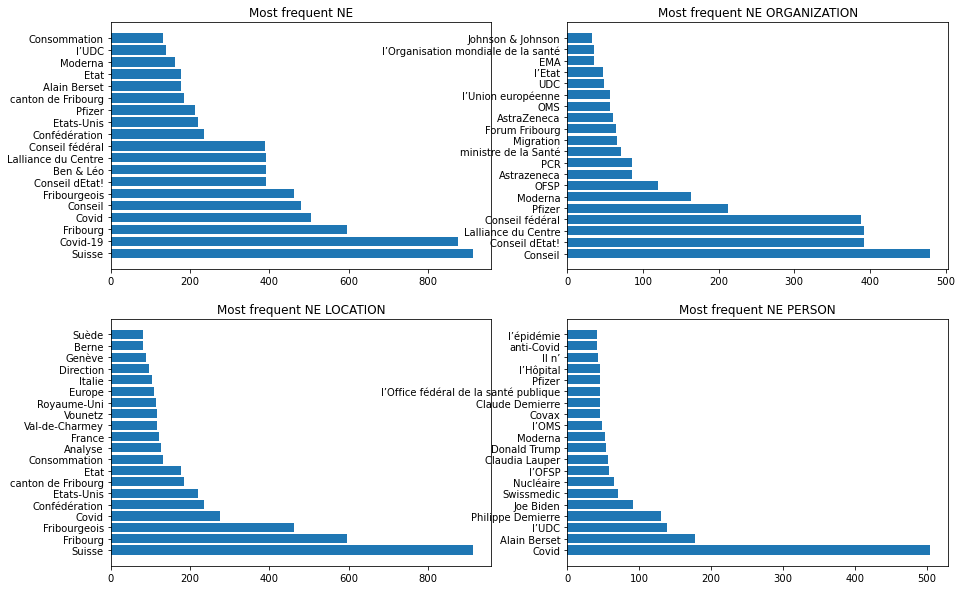

In [314]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')